In [15]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.ticker

In [16]:
params = {
    'figure.figsize':[6,4],
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    }
plt.rcParams.update(params)

In [17]:
pobj = {}
qobj = {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [18]:
al, n0, ml = {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB','MV']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        #n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        #ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].ml[1])).T[1]

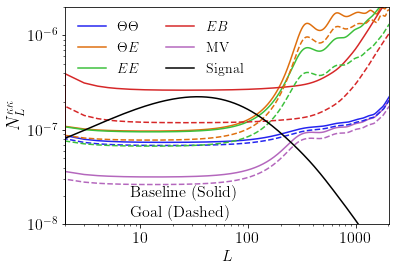

In [22]:
#pl.plot_1dstyle(fsize=[7,4],ylab='$N_L^{\kappa\kappa}$',usetex=True,
#xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=2e-6,**fig_kwargs)
fig, ax = plt.subplots(1, 1)
ax.set_xlim(2,2048)
ax.set_ylim(1e-8,2e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L$',fontsize=16)
ax.set_ylabel(r'$N_L^{\kappa\kappa}$',fontsize=18)
plt.gcf().subplots_adjust(left=0.15)
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
for ntype in ['base','goal']:
    for i, (q, lab) in enumerate(zip(['TT','TE','EE','EB','MV'],[r'$\Theta\Theta$',r'$\Theta E$','$EE$','$EB$','MV'])):
        if ntype == 'base': plot(l,al[ntype+q],color=co[i],ls='-',label=lab)
        if ntype == 'goal': plot(l,al[ntype+q],color=co[i],ls='--')
figtext(0.3,0.22,'Baseline (Solid)',fontsize=16)
figtext(0.3,0.15,'Goal (Dashed)',fontsize=16)
plot(pobj['base'].l,pobj['base'].kk,'k',label='Signal')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
legend(loc=0,ncol=2)
savefig('fig_lens_noise.pdf')